# CQF Python Question 1

####Import modules

In [336]:
import matplotlib.pyplot as plt #Standard plotting package
import numpy as np #Standard array packaged
from matplotlib import rcParams #This allows us to edit the default plotting properties
from nag4py.s import s30qcc, Nag_OrderType #S Chapter Functions
from nag4py.util import Nag_RowMajor, quiet_fail, Nag_Call, Nag_Put, Nag_Comm, nag_int_type, Nag_QP1,Nag_NoPrint #NAG Utilities
#This allows us to plot inline.
%matplotlib inline 

####Set rcParams

In [337]:
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
rcParams.update(params) #Update using the dictionary params

####Define AmericanOptions

In [338]:
def AmericanOption(S, K, T, r, q, sigma, callput):
    K = np.asarray(K, dtype = float) #s30qcc requires K to be a Numpy array with data type float
    T = np.asarray(T, dtype = float) #s30qcc requires T to be a Numpy array with data type float
    p = np.empty(K.size * T.size) #s30qcc requires p to be a Numpy array
    s30qcc(Nag_RowMajor, callput, K.size, T.size, K, S, T, sigma, r, q, p, quiet_fail())
    return p #Return the price array

###Part A
####Set Variables

In [339]:
S = 110; K = 100; T = 0.25; r = 0.08; q = 0.12; sigma = 0.2

####Call AmericanOptions

In [340]:
print(AmericanOption(S, K, T, r, q, sigma, Nag_Call)[0])

10.3340300268


###Part B
####Set Variables

In [341]:
K = np.linspace(50, 150, 1000)

####Call AmericanOptions

In [342]:
price = AmericanOption(S, K, T, r, q, sigma, Nag_Put)

####Plot Result

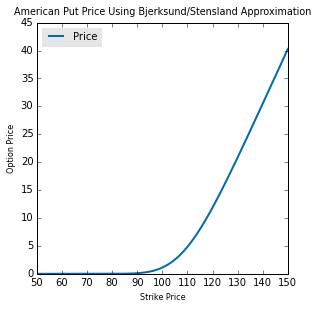

In [343]:
fig, ax = plt.subplots()
ax.plot(K, price,linewidth = 2, color = '#006BB2', label = 'Price')
legend = ax.legend(loc = 2)
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.9')
ax.set_xlim(50, 150)
ax.set_xticks(np.linspace(50, 150, 11));
ax.set_xlabel('Strike Price')
ax.set_title('American Put Price Using Bjerksund/Stensland Approximation', y=1.01)
ax.set_ylabel('Option Price');

#CQF Python Question 2

####Import Modules

In [344]:
from nag4py.c05 import NAG_C05AWC_FUN, c05awc

####Set Variables

In [345]:
K = np.asarray(90, dtype = float)
T = np.asarray(1.5, dtype = float)
S = 100
r = 0.03
q = 0.015
Target = 12.35008695
eps = 1.0e-6
eta = 1.0e-6
nfmax = 1500
sigma = np.asarray(0.15, dtype = float)

####Define BS_Callback

In [346]:
def BS_Callback(sigma, comm):
    p = np.empty(K.size * T.size)
    s30qcc(Nag_RowMajor, Nag_Call, K.size, T.size, K, S, T, sigma, r, q, p, quiet_fail())
    return Target - p

####Call c05awc to find the root

In [347]:
c05awc(sigma, eps, eta, NAG_C05AWC_FUN(BS_Callback), nfmax, Nag_Comm(), quiet_fail())

####Implied Volatility

In [348]:
print(sigma.tolist())

0.09000096312015533


#CQF Python Question 3
####Import Modules

In [349]:
from nag4py.e04 import e04ncc, Nag_E04_Opt, nag_opt_init

####Define solveMarkowitz

In [350]:
def solveMarkowitz(mu, SectorConstraints):
    h = np.array([[5.85,-2.58, 1.41,-3.13, 1.21],
                  [-2.58, 3.97, -2.00, 1.71, -3.21],
                  [1.41, -2.00, 5.15, 4.53, 1.51],
                  [-3.13, 1.71, 4.53, 7.95, 5.43],
                  [1.21, -3.21, 1.51, 5.43, 7.65]], dtype=float)
    n = 5
    m = 5
    if SectorConstraints:
        nclin = 3
        a = np.array([[-0.068, 0.103, 0.087, 0.135, 0.07], 
                      [1.0, 1.0, 1.0, 1.0, 1.0],
                      [0.0, 1.0, 1.0, 0.0, 0.0]])
        bl = np.array([-1, -1, -1, -1, -1, mu, 1, -100], dtype = float)
        bu = np.array([1, 1, 1, 1, 1, mu, 1, 0.5], dtype = float)
    else:
        nclin = 2
        a = np.array([[-0.068, 0.103, 0.087, 0.135, 0.07], 
                      [1.0, 1.0, 1.0, 1.0, 1.0]])
        bl = np.array([-1, -1, -1, -1, -1, mu, 1], dtype = float)
        bu = np.array([1, 1, 1, 1, 1, mu, 1], dtype = float)
    tda = 5
    cvec = np.empty(0)
    b = np.empty(0)
    tdh = 5
    kx = np.empty(n, dtype=nag_int_type)
    x = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
    objf = np.empty(1) 
    options = Nag_E04_Opt()
    nag_opt_init(options)
    options.prob = Nag_QP1
    options.print_level = Nag_NoPrint
    options.list = 0
    fail = quiet_fail()
    e04ncc(m, n, nclin, a, tda, bl, bu, cvec, b, h, tdh, kx, x, objf, options, Nag_Comm(), fail)
    if not fail.code:
        return 2 * objf[0]
    else:
        return -1.0

###Part A

In [351]:
print(solveMarkowitz(0.1, False))

0.301877133072


###Part B
####Define returns

In [352]:
returns = np.linspace(-.1, 0.4, 1000)

####Calculate the minimum risk

In [353]:
minrisk = [solveMarkowitz(mu, False) for mu in returns]

####Select the positive values

In [354]:
minrisk_pos = [x for x in minrisk if x > 0]
returns_pos = [y for x, y in zip(minrisk, returns) if x > 0]

####Plot the Unconstrained Portfolio

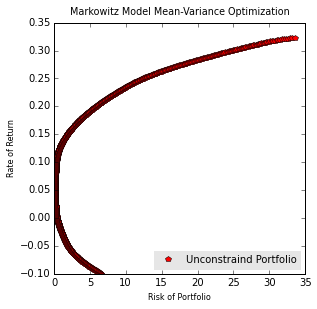

In [355]:
fig, ax = plt.subplots()
ax.plot(minrisk_pos, returns_pos, 'rp', label = 'Unconstraind Portfolio')
legend = ax.legend(loc = 4, numpoints = 1)
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.9')
ax.set_xlabel('Risk of Portfolio')
ax.set_title('Markowitz Model Mean-Variance Optimization', y=1.01)
ax.set_ylabel('Rate of Return');

###Part C
####Calculate the constrained minimum risk

In [356]:
minrisk_constrained = [solveMarkowitz(mu, True) for mu in returns]

####Select the positive values

In [357]:
minrisk_constrained_pos = [x for x in minrisk_constrained if x > 0]
returns_constrained_pos = [y for x, y in zip(minrisk_constrained, returns) if x > 0]

####Plot the Constrained and Unconstrained Portfolios

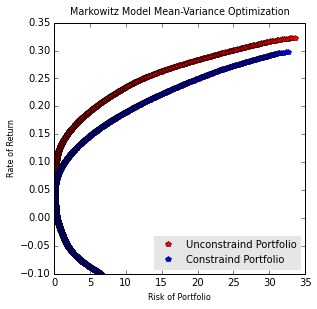

In [358]:
fig, ax = plt.subplots()
ax.plot(minrisk_pos, returns_pos, 'rp', label = 'Unconstraind Portfolio')
ax.plot(minrisk_constrained_pos, returns_constrained_pos, 'bp', label = 'Constraind Portfolio')
legend = ax.legend(loc = 4, numpoints = 1)
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.9')
ax.set_xlabel('Risk of Portfolio')
ax.set_title('Markowitz Model Mean-Variance Optimization', y=1.01)
ax.set_ylabel('Rate of Return');